In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import jinja2
from pycaret.regression import *

In [2]:
#Reading csv file with pandas read_csv and equal it to df1 as variable name
df1 = pd.read_csv('2017.csv')

In [3]:
#Dropping last column which is only contains NAN values then change our variable to df
df = df1.drop('Unnamed: 23', 1)

In [4]:
#checking our dataset first 5 rows
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2017,1,1,0,30,3.7,0,0,0,7,2.4,0,0,0,0,0.367,91.03,145.08,0.87,1020,1.3,310,3.2
1,2017,1,1,1,30,3.3,0,0,0,4,1.9,0,0,0,0,0.365,90.70,134.10,0.87,1020,1.2,309,3.0
2,2017,1,1,2,30,3.0,0,0,0,4,1.5,0,0,0,0,0.362,89.67,122.82,0.87,1020,1.2,305,2.6
3,2017,1,1,3,30,2.7,0,0,0,4,1.0,0,0,0,0,0.358,88.72,111.63,0.87,1021,1.2,295,2.2
4,2017,1,1,4,30,2.4,0,0,0,4,0.6,0,0,0,0,0.353,87.90,100.81,0.87,1021,1.2,280,1.9


In [5]:
#checking our dataset last 5 rows to be sure it sorted as hourly last rows contains 31/12/2017 23.30
df.tail()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
8755,2017,12,31,19,30,6.6,0,0,0,0,5.1,0,0,0,0,0.367,90.03,142.62,0.11,1016,1.1,220,2.3
8756,2017,12,31,20,30,6.5,0,0,0,0,5.1,0,0,0,0,0.363,90.72,152.84,0.11,1017,1.2,225,2.4
8757,2017,12,31,21,30,6.5,0,0,0,0,5.1,0,0,0,0,0.358,90.81,160.35,0.11,1016,1.2,228,2.6
8758,2017,12,31,22,30,6.4,0,0,0,0,5.1,0,0,0,0,0.352,91.40,161.30,0.11,1016,1.3,231,2.8
8759,2017,12,31,23,30,6.3,0,0,0,0,5.0,0,0,0,0,0.348,91.50,154.91,0.11,1016,1.3,233,2.9


In [6]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

Text(0.5, 1.0, 'Missing value in the dataset')

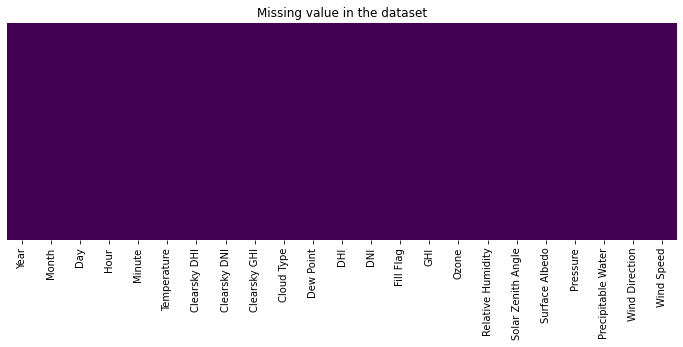

In [7]:
#Visualize summary of null values.
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

In [8]:
df.shape

(8760, 23)

In [9]:
#  We removed 0 values of DNI our target value, its pointless to keep them, cause we dont need night times when sun light doesnt exist
df = df_no_zero = df.loc[df['DNI']!= 0 ]
assert len(df_no_zero['DNI'])==len(df_no_zero['GHI'])

In [10]:
#Our data consist 3167 rows and 23 columns
df.shape 

(3167, 23)

In [11]:
#we created loop which is get row's year,month,day,hour and minute columns and make 1 column name is date_time
cols = ["Year","Month","Day","Hour","Minute"]
df["date_time"] = df[cols].apply(lambda row: "-".join(row.values.astype(str)), axis=1)

In [12]:
#Giving date_time column format
#dropping our 5 columns cause we already got column name date_time contain this info
#setting date_time index
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d-%H-%M')
df=df.drop(["Year","Month","Day","Hour","Minute"],axis = 1)
df=df.set_index('date_time')

In [13]:
df.sort_index(axis = 1)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,DHI,DNI,Dew Point,Fill Flag,GHI,Ozone,Precipitable Water,Pressure,Relative Humidity,Solar Zenith Angle,Surface Albedo,Temperature,Wind Direction,Wind Speed
date_time,,,,,,,,,,,,,,,,,,
2017-01-01 09:30:00,130,720,439,4,186,170,-0.1,0,259,0.335,1.0,1021,75.46,64.60,0.87,3.8,229,2.6
2017-01-01 10:30:00,128,738,449,4,167,354,-0.1,0,320,0.334,0.9,1021,74.36,64.24,0.87,4.1,226,2.7
2017-01-01 11:30:00,115,720,398,4,151,324,0.0,0,278,0.333,0.9,1020,73.58,66.83,0.87,4.3,223,2.8
2017-01-01 12:30:00,91,672,298,4,113,14,0.0,0,118,0.331,0.8,1020,73.54,72.05,0.87,4.3,222,2.8
2017-01-02 06:30:00,42,528,122,0,42,528,-0.9,0,122,0.296,0.6,1020,82.48,81.36,0.12,1.8,194,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 09:30:00,86,750,406,7,185,148,8.6,0,249,0.321,2.1,1006,78.19,64.79,0.12,12.3,169,4.6
2017-12-30 08:30:00,79,721,350,7,143,22,8.1,0,151,0.341,1.9,1006,79.58,67.96,0.11,11.5,140,1.4
2017-12-30 09:30:00,85,760,409,7,183,205,8.4,0,270,0.340,1.9,1005,77.80,64.74,0.11,12.2,120,1.3


In [14]:
#lets check our columns
df.columns

Index(['Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [15]:
df.shape

(3167, 18)

In [16]:
'''DNI is Direct Normal Irradiance while GHI and DHI are diffused
They measured by different sensor DNI measured by Pyrheliometer while other two measured by pyranometer
 Cause of reasons, we'll drop Clearsky DNI (before we start) almost identical with DNI column.
 '''

"DNI is Direct Normal Irradiance while GHI and DHI are diffused\nThey measured by different sensor DNI measured by Pyrheliometer while other two measured by pyranometer\n Cause of reasons, we'll drop Clearsky DNI (before we start) almost identical with DNI column.\n "

In [17]:
df = df.drop(['Clearsky DNI','Clearsky GHI','DHI','Clearsky DHI','Solar Zenith Angle'], 1)

In [18]:
df.shape

(3167, 13)

In [19]:
#Describe dataframe
df.describe()

,Temperature,Cloud Type,Dew Point,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
count,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000,3167.000000
mean,19.187528,1.431955,12.519230,473.062835,0.173350,428.693716,0.316864,66.489795,0.145122,1012.403221,2.108810,133.063783,3.154657
std,6.791943,2.271600,5.849655,308.579565,0.725371,268.163288,0.032649,11.604468,0.080748,5.258753,0.852973,106.961068,1.611753
min,0.200000,0.000000,-5.700000,1.000000,0.000000,4.000000,0.256000,24.960000,0.100000,998.000000,0.400000,0.000000,0.400000
25%,14.000000,0.000000,8.200000,171.000000,0.000000,201.000000,0.290000,58.340000,0.130000,1009.000000,1.500000,42.000000,1.900000
50%,19.700000,0.000000,13.000000,502.000000,0.000000,392.000000,0.311000,66.070000,0.140000,1012.000000,2.000000,77.000000,2.900000
75%,25.000000,2.000000,17.500000,768.000000,0.000000,644.000000,0.343000,74.860000,0.140000,1015.000000,2.700000,229.000000,4.200000
max,34.200000,12.000000,24.700000,976.000000,5.000000,996.000000,0.418000,98.930000,0.870000,1030.000000,4.400000,360.000000,7.800000


Text(0, 0.5, 'DNI W/m2')

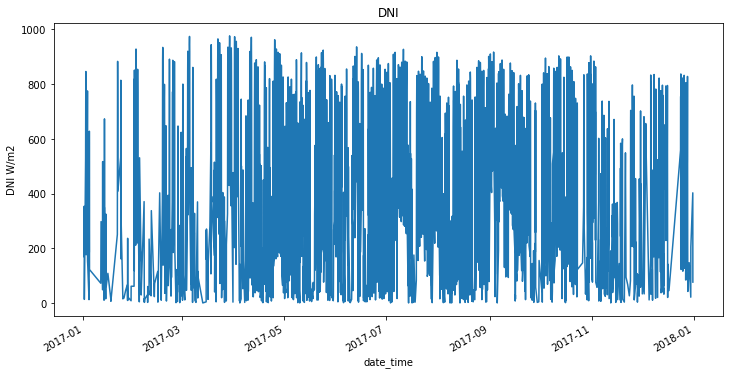

In [20]:
#preview of our target through whole year
df['DNI'].plot(figsize=(12,6), title= 'DNI')
plt.ylabel("DNI W/m2")

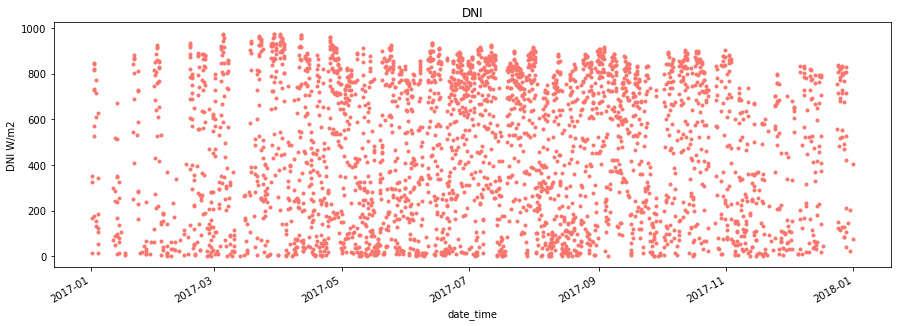

In [21]:
#same preview with dots and different color for  clearify our vision
color_pal = ['#F8766D','#D39200','#93AA00','#00BA38','#00C19F','#00B9E3','#619CFF','#DB72FB']
df['DNI'].plot(style='.',figsize=(15,5),color=color_pal[0],title='DNI')
plt.ylabel("DNI W/m2")
plt.show()

<AxesSubplot:>

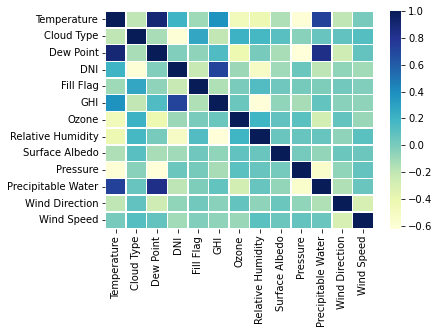

In [22]:
#Correlation between all features
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu", linewidths=.5)

In [23]:
''' Explained relationship GHI and DNI in paper;
In theory we can find GHI with equation which include DNI and DHI
Global Horizontal Irradiance (GHI) = Direct Normal Irradiance (DNI)* cos(solar zenith angle)+Diffused Horizontal Irradiance (DHI)
'''

' Explained relationship GHI and DNI in paper;\nIn theory we can find GHI with equation which include DNI and DHI\nGlobal Horizontal Irradiance (GHI) = Direct Normal Irradiance (DNI)* cos(solar zenith angle)+Diffused Horizontal Irradiance (DHI)\n'

<AxesSubplot:>

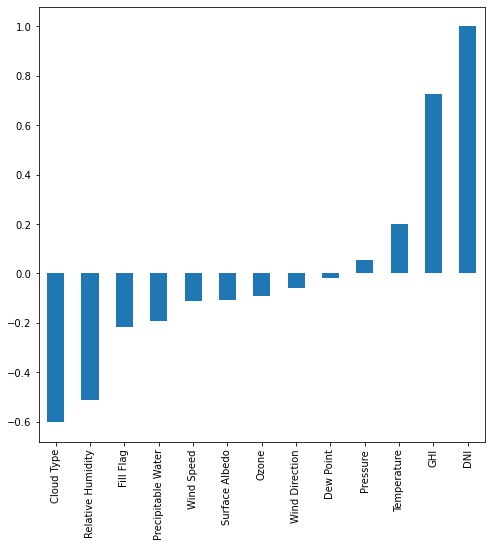

In [24]:
df.corr()["DNI"].sort_values().plot(kind="bar", figsize=(8,8))

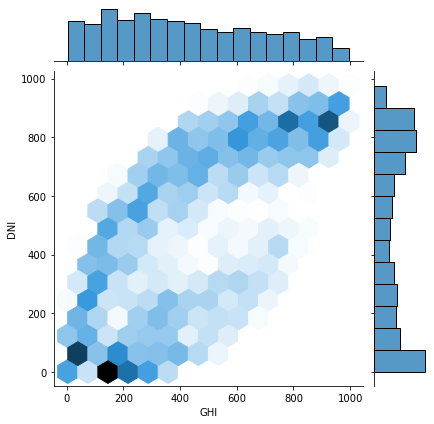

In [25]:
#so pattern between GHI and DHI with hex plot.
_ = sns.jointplot(x = "GHI", y="DNI", data=df, kind = 'hex')

In [26]:
'''Every data points for every columns
If you can't see it, I don't know any other solution, download it as an image and inspect it'''

"Every data points for every columns\nIf you can't see it, I don't know any other solution, download it as an image and inspect it"

In [27]:
#I used pycaret to try many different combinations as possible
#Its using Sklearn library, Used sklearn library too but this is last version for submit

In [28]:
#We divide dataset for validation. 5% of dataset will be not seen by model until predict phase
data = df.sample(frac=0.95, random_state=123)
data_unseen = df.drop(data.index)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3009, 13)
Unseen Data For Predictions: (158, 13)


In [29]:
#Setuping our dataset, adjusting K-fold(cross-validation, if there is null-value imputer can be use)
#If there is outliers, can be removed, if we want to unsupervised learning Can use PCA method for reduce dimensions..
#Our dataset as data, and target value is DNI. session_id is fixed, since we want evaluate model in same condition.
reg = setup(data=data,
           target='DNI', session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 13)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 24)"


In [30]:
#comparing models 
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,36.2402,2737.3051,51.9255,0.9708,0.5408,0.6290,0.4410
lightgbm,Light Gradient Boosting Machine,40.7388,3405.4235,58.0337,0.9637,0.5200,0.5739,0.1090
et,Extra Trees Regressor,40.7103,3445.4317,58.2483,0.9632,0.5334,0.6573,0.0700
xgboost,Extreme Gradient Boosting,41.3270,3547.8741,59.2489,0.9622,0.5404,0.6008,0.0670
gbr,Gradient Boosting Regressor,45.3943,3889.6969,61.9647,0.9585,0.5896,0.7716,0.0420
rf,Random Forest Regressor,43.9692,3903.9110,62.1637,0.9583,0.5639,0.6959,0.0940
dt,Decision Tree Regressor,57.1798,7642.7092,86.5104,0.9183,0.6953,0.6451,0.0060
lr,Linear Regression,72.6723,8632.3781,92.8034,0.9082,0.7525,1.3247,0.4470
br,Bayesian Ridge,72.7578,8643.3879,92.8565,0.9080,0.7520,1.3145,0.0050
ridge,Ridge Regression,73.0790,8704.1641,93.1729,0.9074,0.7533,1.2984,0.0040


In [31]:
#Since catboost is most succesfull We'll decide use it.
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38.7322,3069.9727,55.4073,0.9662,0.5960,0.8726
1,32.7213,2041.0692,45.1782,0.9793,0.4874,0.4499
2,31.7661,1942.2992,44.0715,0.9808,0.5337,0.5557
3,35.2184,2701.6606,51.9775,0.9689,0.4030,0.2556
4,35.6393,2265.1359,47.5934,0.9770,0.5582,0.6318
5,39.9784,4032.7509,63.5039,0.9592,0.5150,0.5135
6,35.5119,2319.1716,48.1578,0.9762,0.5498,0.8966
7,36.4976,2886.9759,53.7306,0.9687,0.5670,0.7885
8,42.3083,3847.9822,62.0321,0.9581,0.7206,0.8065
9,34.0284,2266.0324,47.6029,0.9740,0.4768,0.5191


In [32]:
#tune model for each fold
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.9993,4477.6923,66.9156,0.9507,0.6714,1.0070
1,45.2571,3214.3394,56.6951,0.9674,0.5657,0.6488
2,40.0334,2836.9422,53.2630,0.9719,0.5577,0.6672
3,48.3365,4423.5935,66.5101,0.9492,0.4766,0.4510
4,45.8360,3912.1336,62.5471,0.9604,0.5738,0.7483
5,50.5347,5156.0674,71.8058,0.9478,0.5807,0.6129
6,50.2118,4818.0892,69.4125,0.9505,0.6445,1.0830
7,46.8247,3674.5226,60.6178,0.9602,0.6089,0.7941
8,54.6628,5781.1116,76.0336,0.9371,0.7403,1.1376
9,48.5885,4864.1855,69.7437,0.9441,0.5671,0.7104


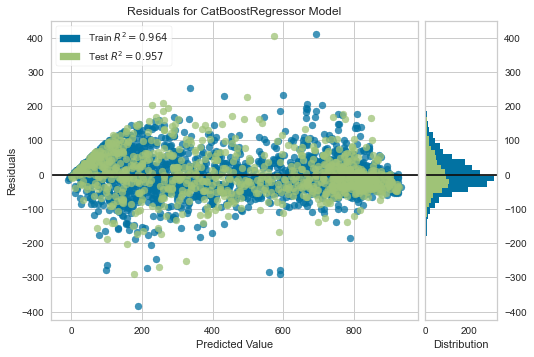

In [33]:
#plot residuals
plot_model(tuned_catboost)

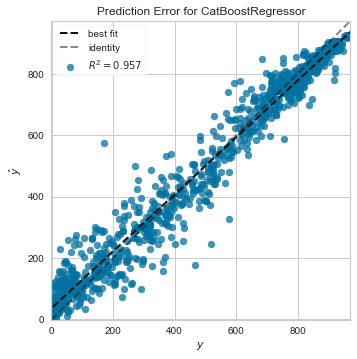

In [34]:
#plot R2 error, how its fit
plot_model(tuned_catboost, plot = 'error')

In [35]:
#this allows see all different of plots
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
#After tuning how it works on test
predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,46.8017,4049.9207,63.6390,0.9572,0.5709,0.7474


,Temperature,Dew Point,GHI,Ozone,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,...,Cloud Type_6,Cloud Type_7,Cloud Type_8,Cloud Type_9,Fill Flag_0,Fill Flag_1,Fill Flag_3,Fill Flag_5,DNI,Label
0,21.000000,11.3,642.0,0.277,54.009998,0.13,1015.0,1.2,236.0,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,863.0,862.131907
1,9.900000,5.5,156.0,0.325,74.309998,0.12,1018.0,0.8,45.0,5.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72.0,101.899498
2,16.100000,13.0,266.0,0.373,81.599998,0.16,1011.0,2.1,94.0,2.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,543.0,539.877365
3,29.700001,17.9,504.0,0.284,49.150002,0.14,1009.0,2.2,47.0,2.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,739.0,694.749570
4,23.500000,15.4,992.0,0.328,60.490002,0.14,1009.0,1.6,38.0,3.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,935.0,907.497194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,8.400000,4.1,227.0,0.362,74.139999,0.12,1018.0,1.2,345.0,1.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,271.0,498.237159
899,21.799999,12.8,239.0,0.298,56.709999,0.14,1012.0,2.3,273.0,2.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,70.887950
900,9.100000,4.5,180.0,0.389,73.029999,0.14,1015.0,1.2,348.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,450.0,457.030745
901,17.600000,8.2,548.0,0.360,54.000000,0.13,1008.0,1.8,265.0,1.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,750.0,738.007530


In [37]:
#finalizing data for fit on whole dataset
final_catboost = finalize_model(tuned_catboost)

In [38]:
#how it works on both test and train
predict_model(final_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,42.4832,3369.6686,58.0488,0.9644,0.5206,0.6049


,Temperature,Dew Point,GHI,Ozone,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,...,Cloud Type_6,Cloud Type_7,Cloud Type_8,Cloud Type_9,Fill Flag_0,Fill Flag_1,Fill Flag_3,Fill Flag_5,DNI,Label
0,21.000000,11.3,642.0,0.277,54.009998,0.13,1015.0,1.2,236.0,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,863.0,862.663538
1,9.900000,5.5,156.0,0.325,74.309998,0.12,1018.0,0.8,45.0,5.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72.0,96.815535
2,16.100000,13.0,266.0,0.373,81.599998,0.16,1011.0,2.1,94.0,2.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,543.0,534.121302
3,29.700001,17.9,504.0,0.284,49.150002,0.14,1009.0,2.2,47.0,2.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,739.0,699.981808
4,23.500000,15.4,992.0,0.328,60.490002,0.14,1009.0,1.6,38.0,3.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,935.0,903.757125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,8.400000,4.1,227.0,0.362,74.139999,0.12,1018.0,1.2,345.0,1.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,271.0,478.030234
899,21.799999,12.8,239.0,0.298,56.709999,0.14,1012.0,2.3,273.0,2.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,77.224952
900,9.100000,4.5,180.0,0.389,73.029999,0.14,1015.0,1.2,348.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,450.0,458.990493
901,17.600000,8.2,548.0,0.360,54.000000,0.13,1008.0,1.8,265.0,1.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,750.0,740.745132


In [39]:
# we divided data as you know 5% for validate. So we can see how perform our model on unseen dataset.
#Label represent predict values and DNI is target so i decided save it as csv and make table.
#But lets glance at data frame
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head(n=15)

,Temperature,Cloud Type,Dew Point,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Label
date_time,,,,,,,,,,,,,,
2017-01-01 12:30:00,4.3,4,0.0,14,0,118,0.331,73.54,0.87,1020,0.8,222,2.8,89.918199
2017-01-03 10:30:00,7.3,2,2.7,154,0,259,0.292,72.34,0.12,1016,1.0,210,4.9,174.390685
2017-01-13 13:30:00,6.1,0,1.4,673,0,200,0.292,71.98,0.87,1013,1.0,180,2.8,532.987220
2017-01-14 14:30:00,8.2,8,5.7,61,3,30,0.314,83.96,0.87,1004,1.7,187,4.8,68.016376
2017-01-15 14:30:00,5.2,1,3.8,109,0,42,0.393,90.61,0.87,1014,1.2,31,3.3,180.425609
2017-01-27 09:30:00,1.0,4,-3.7,10,0,181,0.397,70.66,0.87,1026,0.6,355,5.1,65.349163
2017-01-29 11:30:00,5.4,4,-0.7,9,0,174,0.323,65.00,0.87,1024,0.7,57,3.4,86.575105
2017-02-01 05:30:00,1.3,1,-4.0,212,0,25,0.327,67.60,0.12,1028,0.4,117,2.7,271.376340
2017-02-01 13:30:00,5.1,0,-4.8,759,0,281,0.322,48.76,0.12,1026,0.4,73,0.8,743.200259


In [40]:
#reg as regresion, setup adjust our dataset, split train and test, cross-validation, normalize,scale.
#We can choose what we'll do. Firstly lets start default options.
#Our target value DNI so we just choose it then execute
reg = setup(data=data,
           target='DNI', session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 13)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 24)"


In [41]:
#Compare 19 regression models with each other.The most successful is Catboost Regressor 
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,36.2402,2737.3051,51.9255,0.9708,0.5408,0.6290,0.4430
lightgbm,Light Gradient Boosting Machine,40.7388,3405.4235,58.0337,0.9637,0.5200,0.5739,0.0800
et,Extra Trees Regressor,40.7103,3445.4317,58.2483,0.9632,0.5334,0.6573,0.0700
xgboost,Extreme Gradient Boosting,41.3270,3547.8741,59.2489,0.9622,0.5404,0.6008,0.0520
gbr,Gradient Boosting Regressor,45.3943,3889.6969,61.9647,0.9585,0.5896,0.7716,0.0400
rf,Random Forest Regressor,43.9692,3903.9110,62.1637,0.9583,0.5639,0.6959,0.0930
dt,Decision Tree Regressor,57.1798,7642.7092,86.5104,0.9183,0.6953,0.6451,0.0060
lr,Linear Regression,72.6723,8632.3781,92.8034,0.9082,0.7525,1.3247,0.0050
br,Bayesian Ridge,72.7578,8643.3879,92.8565,0.9080,0.7520,1.3145,0.0050
ridge,Ridge Regression,73.0790,8704.1641,93.1729,0.9074,0.7533,1.2984,0.0050


In [42]:
print(best.get_params())

{'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 123}


In [43]:
#hyperparameter guides, when we create model we can give this params to our model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

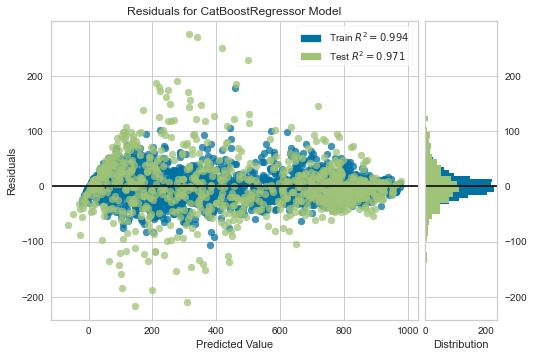

In [44]:
#Residuals
plot_model(best)

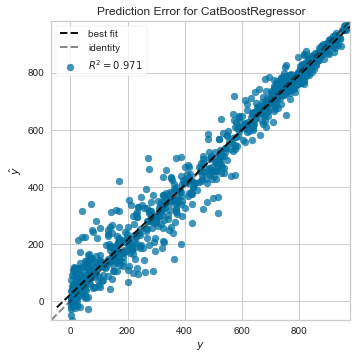

In [45]:
#Errors
plot_model(best, plot ='error')

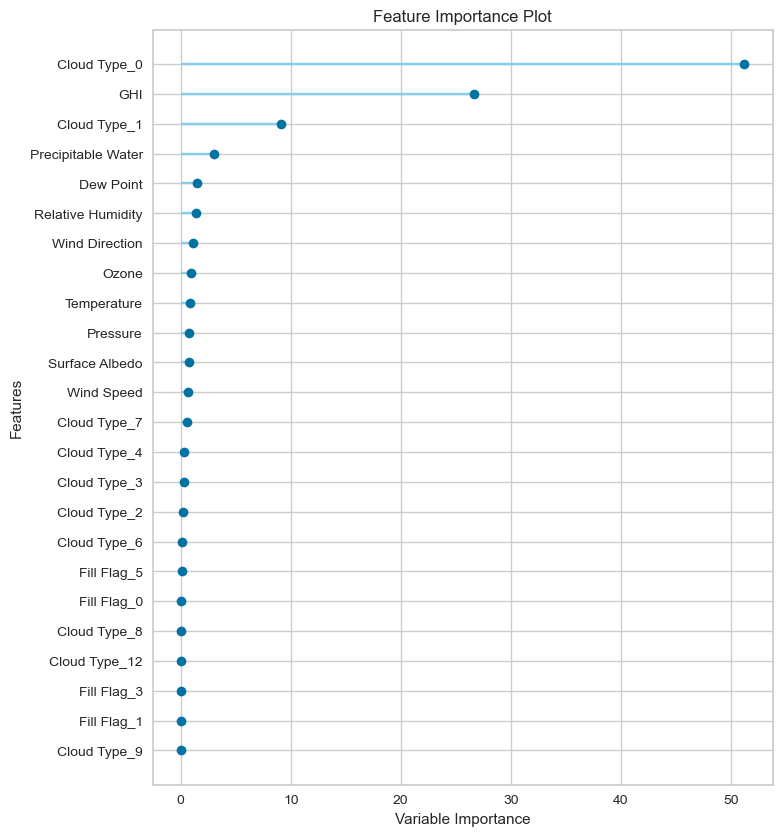

In [46]:
#All features and their value. As you can see a lot of them has got 0 contribution or like 0
#So we are aiming reduce number of inputs. But first lets use other combination on our data
plot_model(best, plot='feature_all')

In [47]:
#Normalized dataset didnt improve our results.
reg = setup(data=data,
           target='DNI',
           use_gpu = True,
           normalize=True,
           session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 13)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 24)"


In [48]:
#Error values increased
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,36.2342,2736.9175,51.9218,0.9709,0.5408,0.6290,1.5210
lightgbm,Light Gradient Boosting Machine,40.7843,3405.5338,58.0105,0.9637,0.5337,0.5839,0.0960
et,Extra Trees Regressor,40.7103,3445.4317,58.2483,0.9632,0.5334,0.6573,0.5670
xgboost,Extreme Gradient Boosting,41.6802,3592.2618,59.6031,0.9617,0.5510,0.6296,0.7260
gbr,Gradient Boosting Regressor,45.3752,3887.1073,61.9439,0.9585,0.5890,0.7706,0.3140
rf,Random Forest Regressor,43.9611,3903.3376,62.1612,0.9583,0.5639,0.6954,0.5690
dt,Decision Tree Regressor,57.1038,7660.7646,86.5837,0.9181,0.6975,0.6449,0.0190
br,Bayesian Ridge,72.6877,8630.9518,92.7980,0.9082,0.7534,1.3193,0.0090
ridge,Ridge Regression,72.7580,8643.0981,92.8665,0.9080,0.7516,1.3102,0.0060
lasso,Lasso Regression,76.0323,9380.8704,96.7265,0.9002,0.7659,1.2951,0.0100


In [49]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38.7295,3069.9605,55.4072,0.9662,0.5960,0.8725
1,32.7205,2040.9530,45.1769,0.9793,0.4874,0.4499
2,31.7671,1942.3064,44.0716,0.9808,0.5337,0.5557
3,35.2079,2700.5158,51.9665,0.9690,0.4029,0.2554
4,35.6233,2264.1322,47.5829,0.9771,0.5582,0.6318
5,39.9784,4032.8559,63.5048,0.9592,0.5150,0.5135
6,35.5119,2319.1716,48.1578,0.9762,0.5498,0.8966
7,36.4704,2885.9657,53.7212,0.9687,0.5670,0.7884
8,42.3061,3847.4008,62.0274,0.9581,0.7206,0.8065
9,34.0275,2265.9129,47.6016,0.9740,0.4768,0.5191


In [50]:
print(catboost.feature_names_ )

['Temperature', 'Dew Point', 'GHI', 'Ozone', 'Relative Humidity', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Cloud Type_0', 'Cloud Type_1', 'Cloud Type_12', 'Cloud Type_2', 'Cloud Type_3', 'Cloud Type_4', 'Cloud Type_6', 'Cloud Type_7', 'Cloud Type_8', 'Cloud Type_9', 'Fill Flag_0', 'Fill Flag_1', 'Fill Flag_3', 'Fill Flag_5']


In [51]:
#tune model with optimum hypermeters. Using Random Grid Search
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.9925,4477.0223,66.9106,0.9507,0.6714,1.0070
1,45.2571,3214.3394,56.6951,0.9674,0.5657,0.6488
2,40.0334,2836.9422,53.2630,0.9719,0.5577,0.6672
3,48.3391,4423.6867,66.5108,0.9492,0.4766,0.4510
4,45.8360,3912.1336,62.5471,0.9604,0.5738,0.7483
5,50.5141,5155.5326,71.8020,0.9479,0.5807,0.6129
6,50.2118,4818.0892,69.4125,0.9505,0.6445,1.0830
7,46.8218,3674.3143,60.6161,0.9602,0.6089,0.7941
8,54.6628,5781.1116,76.0336,0.9371,0.7403,1.1376
9,48.5885,4864.1855,69.7437,0.9441,0.5671,0.7104


In [52]:
#Our best parameters
print(tuned_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


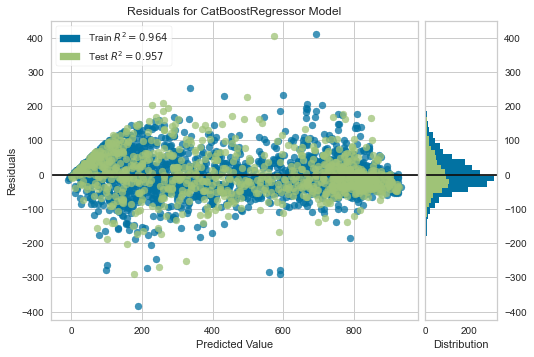

In [53]:
plot_model(tuned_catboost)

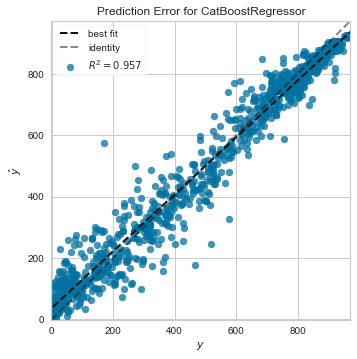

In [54]:
plot_model(tuned_catboost, plot = 'error')

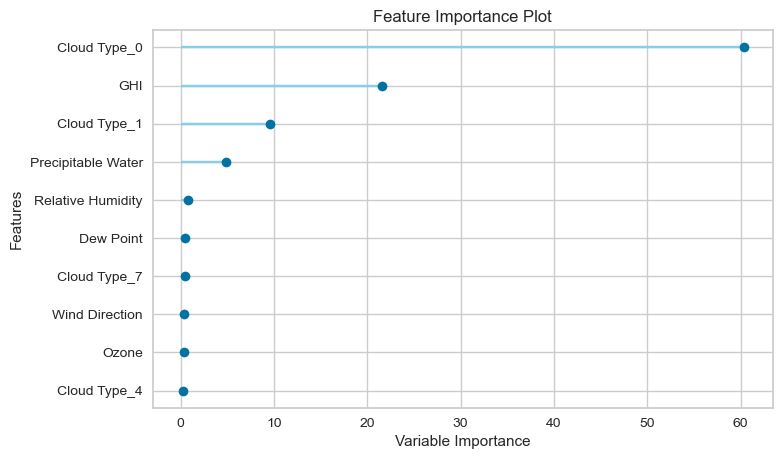

In [55]:
plot_model(tuned_catboost, plot='feature')

In [56]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [57]:
final_catboost = finalize_model(tuned_catboost)

In [58]:
print(final_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [59]:
final_catboost.feature_names_

['Temperature',
 'Dew Point',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Surface Albedo',
 'Pressure',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_12',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9',
 'Fill Flag_0',
 'Fill Flag_1',
 'Fill Flag_3',
 'Fill Flag_5']

In [60]:
normalize_results=predict_model(final_catboost, data=data_unseen)
normalize_results.to_csv('predictwithnormalizejune.csv', index=False)

In [61]:
final_catboost.feature_names_ 

['Temperature',
 'Dew Point',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Surface Albedo',
 'Pressure',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_12',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9',
 'Fill Flag_0',
 'Fill Flag_1',
 'Fill Flag_3',
 'Fill Flag_5']

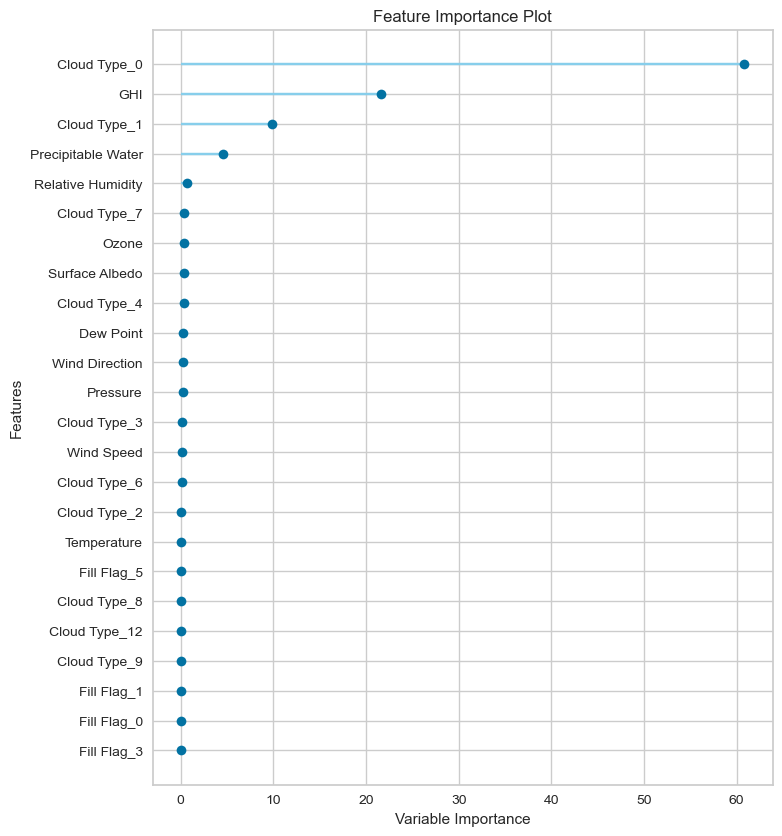

In [62]:
plot_model(final_catboost, plot='feature_all')

In [63]:
data.columns

Index(['Temperature', 'Cloud Type', 'Dew Point', 'DNI', 'Fill Flag', 'GHI',
       'Ozone', 'Relative Humidity', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [64]:
#removing these features from both validation data and dataset.
data = data.drop(['Fill Flag','Temperature', 'Wind Direction','Wind Speed', 'Pressure'], 1)
data_unseen = data_unseen.drop(['Fill Flag','Temperature', 'Wind Direction','Wind Speed', 'Pressure'], 1)

In [65]:
#Checking shapes to be sure
data.shape

(3009, 8)

In [66]:
#checking column names
data.columns

Index(['Cloud Type', 'Dew Point', 'DNI', 'GHI', 'Ozone', 'Relative Humidity',
       'Surface Albedo', 'Precipitable Water'],
      dtype='object')

In [67]:
#checking again with normal then we'll repeat this with normalize.
reg = setup(data=data,
           target='DNI', session_id = 123)

,Description,Value
0,session_id,123
1,Target,DNI
2,Original Data,"(3009, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2106, 16)"


In [68]:
best = compare_models(exclude=['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,37.8406,2909.6819,53.6384,0.9690,0.5399,0.6014,0.3050
et,Extra Trees Regressor,40.8197,3477.9284,58.5734,0.9629,0.5311,0.6648,0.0610
lightgbm,Light Gradient Boosting Machine,42.0732,3599.0044,59.6054,0.9616,0.5368,0.6290,0.0790
xgboost,Extreme Gradient Boosting,43.0050,3738.2640,60.7175,0.9601,0.5651,0.6945,0.0440
rf,Random Forest Regressor,43.7870,3872.9337,61.8621,0.9586,0.5576,0.7067,0.0770
gbr,Gradient Boosting Regressor,46.4682,4015.7547,63.0485,0.9572,0.5801,0.7398,0.0280
dt,Decision Tree Regressor,56.3473,7045.4361,83.3189,0.9248,0.6736,0.7063,0.0050
lr,Linear Regression,75.8918,9470.5521,97.1974,0.8992,0.7470,1.3054,0.0050
br,Bayesian Ridge,75.9777,9476.8991,97.2298,0.8992,0.7479,1.3012,0.0050
lar,Least Angle Regression,76.0152,9532.5695,97.5038,0.8986,0.7500,1.3217,0.0050


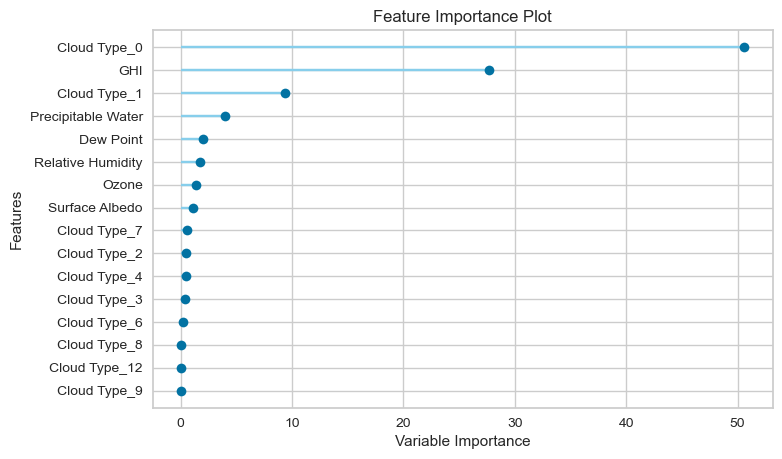

In [69]:
plot_model(best, plot='feature_all')

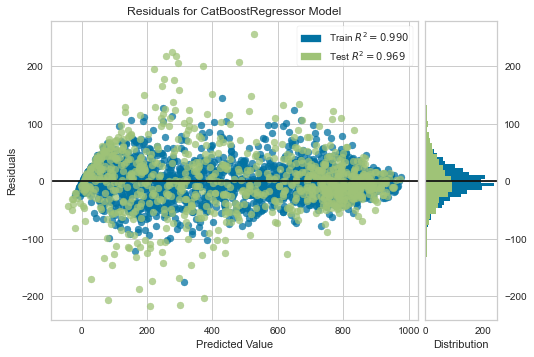

In [70]:
plot_model(best)

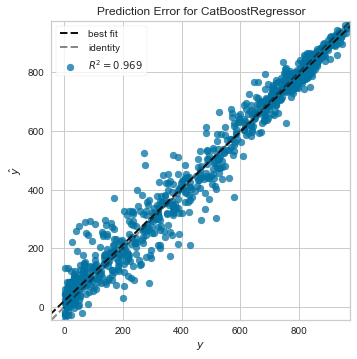

In [71]:
plot_model(best, plot='error')

In [72]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [73]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,40.5784,3176.8447,56.3635,0.9650,0.5866,0.7044
1,33.7833,2218.5627,47.1016,0.9775,0.4170,0.3943
2,31.3497,1953.4666,44.1980,0.9807,0.5252,0.5229
3,38.4311,2889.9704,53.7584,0.9668,0.3988,0.3552
4,36.5552,2575.3194,50.7476,0.9739,0.4900,0.5165
5,40.4080,4025.0770,63.4435,0.9593,0.4739,0.4612
6,37.7414,2732.9084,52.2772,0.9719,0.6312,1.0079
7,39.2114,3007.1368,54.8374,0.9674,0.6278,0.6893
8,43.3187,3874.1180,62.2424,0.9578,0.7169,0.7889
9,37.0291,2643.4148,51.4141,0.9696,0.5318,0.5729


In [74]:
tuned_catboost = tune_model(catboost)
print(tuned_catboost.get_params())

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,49.6164,4535.2860,67.3445,0.9501,0.6556,0.9539
1,45.4538,3316.9859,57.5933,0.9664,0.5370,0.5825
2,39.6474,2794.3215,52.8613,0.9723,0.5241,0.5901
3,48.4704,4402.4713,66.3511,0.9494,0.4721,0.4408
4,45.8892,4011.8939,63.3395,0.9593,0.5516,0.6480
5,50.9203,5089.2607,71.3391,0.9485,0.5768,0.5715
6,50.2169,4852.2579,69.6582,0.9502,0.6188,1.0084
7,46.5657,3655.2947,60.4590,0.9604,0.6090,0.7814
8,54.9151,5806.2599,76.1988,0.9368,0.7383,1.1538
9,48.5656,4874.8339,69.8200,0.9440,0.5551,0.6644


{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [75]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
final_catboost = finalize_model(tuned_catboost)

In [77]:
predict_model(final_catboost, data=data_unseen)

,Cloud Type,Dew Point,DNI,GHI,Ozone,Relative Humidity,Surface Albedo,Precipitable Water,Label
date_time,,,,,,,,,
2017-01-01 12:30:00,4,0.0,14,118,0.331,73.54,0.87,0.8,83.955727
2017-01-03 10:30:00,2,2.7,154,259,0.292,72.34,0.12,1.0,173.980820
2017-01-13 13:30:00,0,1.4,673,200,0.292,71.98,0.87,1.0,530.955885
2017-01-14 14:30:00,8,5.7,61,30,0.314,83.96,0.87,1.7,50.614839
2017-01-15 14:30:00,1,3.8,109,42,0.393,90.61,0.87,1.2,177.908348
...,...,...,...,...,...,...,...,...,...
2017-12-11 09:30:00,0,7.1,822,431,0.317,64.40,0.11,1.2,817.533454
2017-12-13 08:30:00,7,10.7,329,272,0.301,80.99,0.11,1.6,250.743959
2017-12-15 08:30:00,0,10.7,762,366,0.275,79.02,0.11,1.6,712.058397


In [78]:
#saving results as csv so we can check it later.
normalize_results=predict_model(final_catboost, data=data_unseen)
normalize_results.to_csv('lessinputsjune.csv', index=False)

In [79]:
print(final_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [80]:
final_catboost.feature_names_

['Dew Point',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Surface Albedo',
 'Precipitable Water',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_12',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9']

In [81]:
#import pickle for model deployment
import pickle
model =final_catboost

In [82]:
with open ('validatedlastversionjune','wb') as file:
    pickle.dump(model, file)